# Problem 1 - Answers

**Simulating binary collisions**

## Rutherford Scattering

*Rutherford scattering* is the elastic scattering of charges interacting via a Coulomb potential. Here we will be modelling Rutherford's original experiment - scattering of fast-moving alpha particles off of stationary Gold nuclei.

a) Define some relevant constants for this simulation, including the masses and charges of Helium and Gold nuclei, and the initial speed of the alpha particles (use a speed of $10^7$ms$^{-1}$). Also define a function describing the Coulomb interaction force:

$$ F_{C} = \frac{Qq}{4\pi\epsilon_0r^3}\mathbf{r} $$

In [1]:
# Useful imports

%matplotlib inline
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

# Define relevant parameters

q1 = constants.e * 79  # Large nucleus charge
q2 = constants.e * 2   # Small nuclear charge
m = 6.64424e-27       # Small nucleus mass
v0 = 1e7              # Initial velocity

# Define a Coulomb potential
def Coulomb(r,Q,q):
    return Q*q/(4*np.pi*constants.epsilon_0*np.linalg.norm(r)**3) * r

b) There are two important simulation parameters which wish to estimate: the size of the simulation domain, and the time step of the simulation. The simulation domain should be much larger than the length scale of the interaction force, and the time step should be small enough that a particle takes many time steps to traverse this length scale. 

Approximate the length scale of the Coulomb interaction as the radius at which the kinetic energy of the incident alpha particle and the Coulomb potential energy are equal, and use this to set the simulation domain size and time step.

Equating:

$$ \frac{1}{2}mv^2 = \frac{Qq}{4\pi\epsilon_0r} $$

In [2]:
r_int = q1*q2/(2*np.pi*constants.epsilon_0*m*v0**2)
print(r_int)

1.0972458950007652e-13


and using the above values for mass and charges, we get $r\approx10^{-13}$m. So we pick a simulation domain size of $10^{-12}$m, and a time step of $10^{-22}$s. (It is generally good practice to be cautious in choosing such parameters, and worth checking that you are fully resolving the phenomena of interest and that your results don't change when increasing the resolution of the simulation.) 

c) Consider a simulation domain in which a Gold nucleus is located at the origin, and has your chosen extent in both directions along the z-axis. The domain will have no fixed extent in the x and y axes. 

Define a `collide` function which simulates the trajectory of an alpha particle in this simulation domain. The alpha particle will have a fixed initial velocity pointing in the z-direction. It should have an initial position on one simulation boundary. The 'impact parameter' or distance between the particle's initial position and the z-axis should be an argument of your function. The trajectory of the alpha subject to the Coulomb force should be numerically integrated until the particle leaves the simulation domain (you may use a simple Euler method to do this.) The function should return the trajectory of the particle.

In [3]:
sd = 1e-12            # Size of simulation domain (in z axis)
dt = 1e-22            # Simulation time step

# Define a function to simulate ion trajectory
def collide(b):
    rvals = []  # A list to record the trajectory of the particle for plotting
    r = np.array([b,0.0,-sd])   # Initial particle position
    v = np.array([0.0,0.0,v0])  # Initial particle velocity
    
    exited = False
    while not exited:
        rvals.append(r.copy())  # Record current position
        
        # Evaluate Coulomb force and take an Euler step
        v += dt * Coulomb(r,q1,q2) / m  
        r += dt * v
        
        # If the particle z-position is outside of the simulation domain, terminate
        if np.abs(r[2]) > sd:
            exited = True
            
    # return the particle trajectory
    return rvals

d) Plot these trajectories for a range of different impact parameters. 

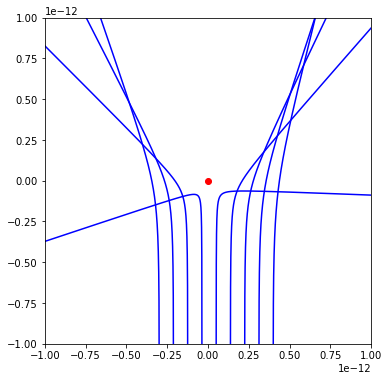

In [4]:
# Figure set up
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlim((-1e-12,1e-12))
ax.set_ylim((-1e-12,1e-12))
ax.plot([0.0],[0.0],'ro')
ax.set_aspect(aspect=1.0)

for b in np.linspace(-3e-13,4.0e-13,9):
    rv = collide(b)
    rv = np.array(rv)
    ax.plot(rv[:,0],rv[:,2],'b')

## Hard Sphere Scattering

An alternative simple model of binary collision is that of scattering off of a hard sphere.

a) Modify your `collide` function to accept an additional argument R, the radius of a hard-sphere atom model. Without removing your implementation of the Coulomb force, add a condition which checks if the alpha hits the surface of the sphere, and if so is reflected. 

In [5]:
def collide(b,R):
    rvals = []
    r = np.array([b,0.0,-sd])
    v = np.array([0.0,0.0,v0])
    
    exited = False
    while not exited:
        rvals.append(r.copy())
        v += dt * Coulomb(r,q1,q2) / m
        r += dt * v
        if np.abs(r[2]) > sd:
            exited = True
            
        # If the alpha position goes inside the sphere, reflect
        # its velocity vector across the sphere normal
        elif np.linalg.norm(r) <= R:
            n = r / np.linalg.norm(r)
            v = v - 2*np.dot(v,n)*n
    return rvals

b) To simulate scattering off of an uncharged hard sphere, set the charge on the Gold nucleus to zero and give it a radius of $10^{-13}$m. Plot the trajectories of alpha particles for a range of impact parameters.

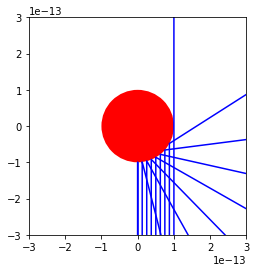

In [6]:
# Set Gold nucleus charge to zero
q1 = 0.0

# Figure set up
fig,ax = plt.subplots()
ax.set_xlim((-0.3e-12,0.3e-12))
ax.set_ylim((-0.3e-12,0.3e-12))
patch = plt.Circle((0.0,0.0), 1e-13, fc='r')
ax.add_patch(patch)
ax.set_aspect(aspect=1.0)

for b in np.linspace(0,1e-13,9):
    rv = collide(b,1e-13)
    rv = np.array(rv)
    ax.plot(rv[:,0],rv[:,2],'b')

c) Now we will consider the interaction of particles with a charged hard sphere. Return the charge on the particle at the origin to the Gold nuclear charge. Now simulate the trajectories of alphas with a range of impact parameters. Try changing the radius of the hard sphere to see how this changes how much the situation resembles hard sphere scattering vs Rutherford scattering.

Using the same sphere radius of $10^{-13}$m, we see the interaction is principally Coulombic.

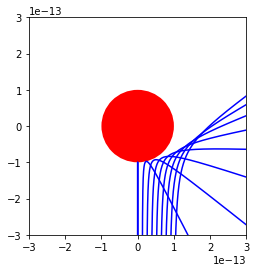

In [7]:
# Set hard sphere charge to Gold charge
q1 = constants.e * 79

# Figure set up
fig,ax = plt.subplots()
ax.set_xlim((-0.3e-12,0.3e-12))
ax.set_ylim((-0.3e-12,0.3e-12))
patch = plt.Circle((0.0,0.0), 1e-13, fc='r')
ax.add_patch(patch)
ax.set_aspect(aspect=1.0)

for b in np.linspace(0,1e-13,9):
    rv = collide(b,1e-13)
    rv = np.array(rv)
    ax.plot(rv[:,0],rv[:,2],'b')

If we instead use a larger sphere radius of $3\times 10^{-13}$m, we get a situation more closely resembling hard sphere scattering.

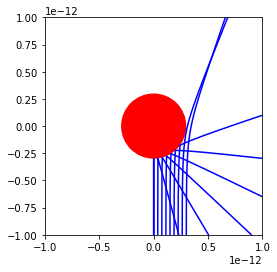

In [8]:
# Figure set up
fig,ax = plt.subplots()
ax.set_xlim((-1e-12,1e-12))
ax.set_ylim((-1e-12,1e-12))
patch = plt.Circle((0.0,0.0), 3e-13, fc='r')
ax.add_patch(patch)
ax.set_aspect(aspect=1.0)

for b in np.linspace(0,3e-13,9):
    rv = collide(b,3e-13)
    rv = np.array(rv)
    ax.plot(rv[:,0],rv[:,2],'b')